In [14]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes



Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Successfully uninstalled scikit-learn-1.3.0


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sadma\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\sadma\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\sadma\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\sadma\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\sadma\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\sadma\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sadma\anaconda3\Lib\site-packages\pip\_vend

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
    --------------------------------------- 0.1/8.3 MB 1.8 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/8.3 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.3 MB 9.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.5/8.3 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 3.7/8.3 MB 14.7 MB/s eta 0:00:01
   ----------------------- ---------------- 4.8/8.3 MB 16.0 MB/s eta 0:00:01
   --------------------------- ------------ 5.7/8.3 MB 16.7 MB/s eta 

In [ ]:
!pip install scikit-learn==1.2.2

In [18]:
!pip install imblearn

In [50]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 919.0 kB/s eta 0:01:49
   ---------------------------------------- 0.6/99.8 MB 4.5 MB/s eta 0:00:23
    --------------------------------------- 1.3/99.8 MB 7.7 MB/s eta 0:00:13
    --------------------------------------- 2.2/99.8 MB 10.6 MB/s eta 0:00:10
   - -------------------------------------- 3.1/99.8 MB 12.3 MB/s eta 0:00:08
   - -------------------------------------- 4.0/99.8 MB 12.8 MB/s eta 0:00:08
   - -------------------------------------- 4.8/99.8 MB 14.0 MB/s eta 0:00:07
   -- ------------------------------------- 5.7/99.8 MB 14.7 MB/s eta 0:00:07
   -- --------------------------

In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import ADASYN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [499]:
from imblearn.over_sampling import SMOTE

# EDA - Exploratory Data Analysis

In [500]:
#Loading the dataset
df = pd.read_excel("C:/Users/sadma/OneDrive - St. Lawrence College/SEM 3/Financial analytics/Bankruptcy_data.xlsx")

In [501]:
df_copy = df.copy()

In [502]:
df_copy.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [503]:
# Columns and rows within this dataset
num_rows, num_columns = df_copy.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

#There are 13 attributes of this dataset and 92,872 observations. We will use 12 of the atributes as our features and one target variable.

Number of rows: 92872
Number of columns: 13


In [504]:
# Colum datatypes:
df_copy.dtypes
#Note: All columns are numeric(INT64, float64)

EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
BK                      int64
dtype: object

In [505]:
# Filter out float-type numeric columns (excluding 'bankruptcy')
float_columns = df_copy.select_dtypes(include=['float']).columns

# Generate descriptive statistics for float-type numeric columns (excluding 'bankruptcy') and transpose the result
summary_stats = df_copy[float_columns].describe().T



In [506]:
summary_stats

,count,mean,std,min,25%,50%,75%,max
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92815.0,358.506265,26063.637981,-3.151500e+06,11.200000,58.280000,240.140000,3455419.33
Assets Growth,86171.0,1.294075,73.769522,-1.000000e+00,-0.052596,0.051844,0.192062,14231.00


In [298]:
file_path = os.path.join(folder, 'summary Stats(1).xlsx')
summary_stats.to_excel(file_path, index=True)

In [507]:
# Filter out float-type numeric columns (excluding 'bankruptcy')
float_columns = df_copy.select_dtypes(include=['float']).columns

# Create a DataFrame to store median values for each column
median_values = pd.DataFrame(index=float_columns, columns=['Median'])

# Calculate and store the median value for each column
for column in float_columns:
    median_values.loc[column, 'Median'] = df_copy[column].median()

# Display the DataFrame containing median values for each column
print("Median values for all columns:")
print(round(median_values, 2))

Median values for all columns:
                      Median
EPS                     0.33
Liquidity               0.19
Profitability           0.07
Productivity            0.06
Leverage Ratio          0.28
Asset Turnover          0.83
Operational Margin      0.06
Return on Equity        0.03
Market Book Ratio      58.28
Assets Growth       0.051844
Sales Growth        0.059733
Employee Growth     0.017241


In [508]:
#just to check 
subset_df = df_copy[df_copy.isnull().any(axis=1)]

In [509]:
subset_df

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN,0
39,-2.640000,0.000000,0.100000,-0.030000,1.700000,1.170000,-0.020000,-0.290000,10.660000,NaN,NaN,NaN,0
75,0.250000,0.430000,0.250000,0.190000,0.500000,1.670000,0.120000,0.170000,0.580000,NaN,NaN,NaN,0
81,-0.070000,0.000000,-1.350000,-0.060000,0.890000,0.000000,NaN,-0.150000,18.550000,-0.218728,-1.000000,-0.933333,0
82,-0.020000,0.080000,-1.100000,-0.050000,1.530000,0.000000,NaN,-0.040000,20.250000,0.293687,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,5.988079,0.018802,0.234296,0.075497,1.058632,0.433380,0.174205,0.606081,43.570500,NaN,NaN,NaN,0
92854,-2.782816,-0.425169,0.135900,0.047357,1.633943,0.361437,0.131025,-0.809546,15.304359,0.105867,-0.023628,NaN,0
92855,1.844219,-0.469218,0.100666,0.026345,1.525394,0.351082,0.075039,1.229480,6.728955,-0.111513,-0.136970,NaN,1
92856,1.327284,0.127155,0.075476,0.135145,0.441655,0.344380,0.392431,0.072057,65.840824,NaN,NaN,NaN,0


In [510]:
# Check what columns have missing values
for column in df_copy.columns:
    nan_count = df_copy[column].isna().sum()

    print(f"NaN values in {column}: {nan_count}")

NaN values in EPS: 5
NaN values in Liquidity: 247
NaN values in Profitability: 247
NaN values in Productivity: 247
NaN values in Leverage Ratio: 26
NaN values in Asset Turnover: 247
NaN values in Operational Margin: 5557
NaN values in Return on Equity: 8
NaN values in Market Book Ratio: 57
NaN values in Assets Growth: 6701
NaN values in Sales Growth: 6701
NaN values in Employee Growth: 7010
NaN values in BK: 0


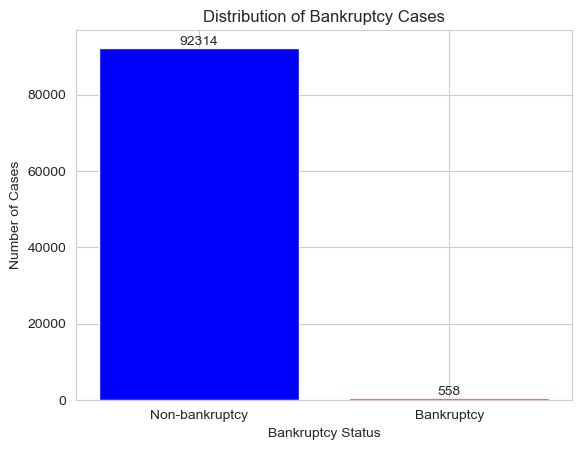

In [511]:
labels = [0, 1] 
count_bankruptcy = df_copy['BK'].value_counts()


# Plotting the bar chart

bars = plt.bar(labels, count_bankruptcy, color=['blue', 'red'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
# Adding labels and title
plt.xlabel('Bankruptcy Status')
plt.ylabel('Number of Cases')
plt.title('Distribution of Bankruptcy Cases')

# Adding custom tick labels
plt.xticks(labels, ['Non-bankruptcy', 'Bankruptcy'])

# Display the plot
plt.show()

#There 92314 cases of no banktruptcy and only 558 cases of banktruptcy


### We will look at the distribution of all the numeric features,
### Look for outliers, anomalies and of the dataset
### We will also look for duplicates in the dataset and remove them

In [512]:
# We will look for mild and extreme outliers through all the numeric columns using box plots
df_copy.columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

In [513]:
columns_except_bk = df_copy.columns.difference(['BK']) #I wanted to find rows that are exact duplicates of each other hence I removed the BK column because there will be a lot of rows bk duplicated obviously

# Find duplicates based on these columns
duplicates_mask = df_copy.duplicated(subset=columns_except_bk, keep=False)

# Filter the DataFrame to show only the duplicates
duplicates_df = df_copy.loc[duplicates_mask]


# Print the duplicates DataFrame to inspect the duplicated rows

# If you want to see the count of these duplicate rows
print(f"Number of rows that are duplicates of each other: {len(duplicates_df)}")

#There are 27 duplicate values in the dataset. Each pair of identical rows is counted as one duplicate. The count shows 54 duplicates because both the original value and its duplicate are printed.



Number of rows that are duplicates of each other: 54


In [170]:
#To ensure my code was correct I exported my df_copy as a csv file
import os

# Get the path to the user's downloads folder
folder = os.path.expanduser('/Users/sadma/Downloads')

# Specify the full path including the file name
csv_path = os.path.join(folder, 'duplicates.csv')

# Save the DataFrame to a CSV file in the downloads folder
duplicates_df.to_csv(csv_path, index=False)



In [434]:
len(df_copy)

92872

In [514]:
df_copy= df_copy.drop_duplicates(subset=columns_except_bk, keep='first')

In [436]:
len(df_copy)

92845

In [437]:
#Export the new dataframe as a csv file after removing the duplicates
csv_path = os.path.join(folder,'df_copy.csv')
df_copy.to_csv(csv_path,index=False)

In [515]:
org_df = len(df)
copy_df = len(df_copy)

print(org_df)
print(copy_df)

print(f'{org_df - copy_df} rows were removed as they were exact duplicates')


92872
92845
27 rows were removed as they were exact duplicates


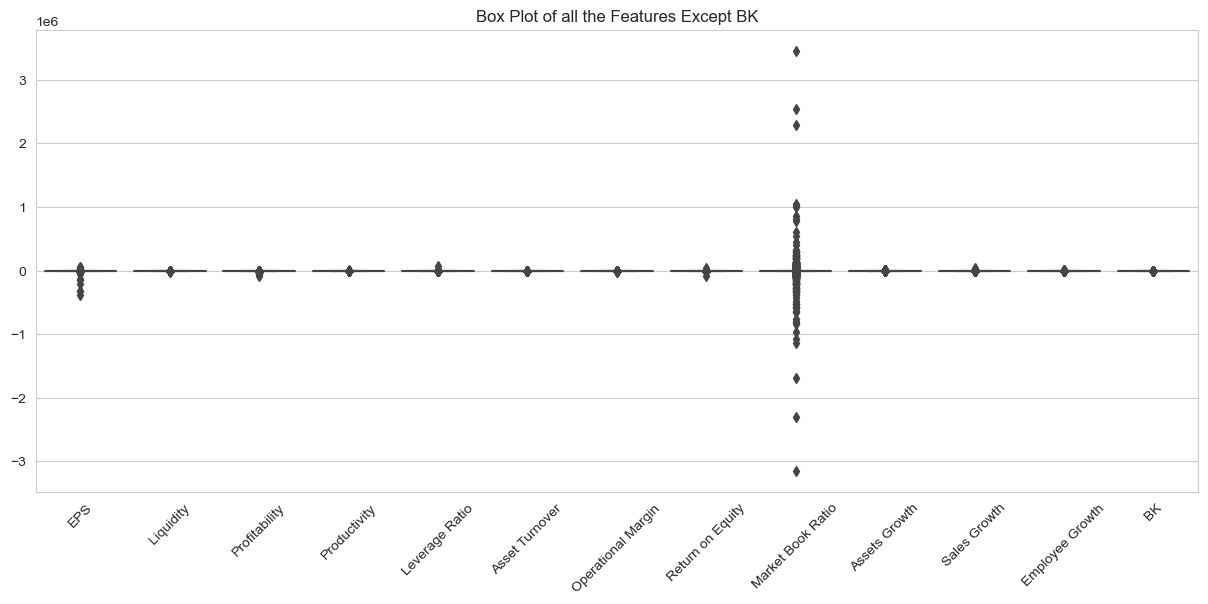

In [516]:
columns = df_copy.columns
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_copy[columns])
plt.title("Box Plot of all the Features Except BK")
plt.xticks(rotation=45)  
plt.show()

In [517]:
def count_outliers(df, features):
    outlier_counts = {}

    for outliers in features:
        # 1st quartile (25%)
        Q1 = df[outliers].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = df[outliers].quantile(0.75)
        # IQR
        IQR = Q3 - Q1

        # Define the fences
        lower_inner_fence = Q1 - 1.5 * IQR
        upper_inner_fence = Q3 + 1.5 * IQR
        lower_outer_fence = Q1 - 3 * IQR
        upper_outer_fence = Q3 + 3 * IQR

        # Count of outliers
        count_inner = df[(df[outliers] < lower_inner_fence) | (df[outliers] > upper_inner_fence)].shape[0]
        count_outer = df[(df[outliers] < lower_outer_fence) | (df[outliers] > upper_outer_fence)].shape[0]

        outlier_counts[outliers] = {'Inner': count_inner, 'Outer': count_outer}

    return outlier_counts

# Columns to check for outliers
check_outliers = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover',
                   'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth',
                   'Employee Growth']

# Count outliers in each column
outlier_counts = count_outliers(df_copy, check_outliers)
outlier_counts


{'EPS': {'Inner': 8386, 'Outer': 3043},
 'Liquidity': {'Inner': 4467, 'Outer': 3162},
 'Profitability': {'Inner': 14150, 'Outer': 10664},
 'Productivity': {'Inner': 13229, 'Outer': 8496},
 'Leverage Ratio': {'Inner': 10341, 'Outer': 5850},
 'Asset Turnover': {'Inner': 3706, 'Outer': 1028},
 'Operational Margin': {'Inner': 15577, 'Outer': 11022},
 'Return on Equity': {'Inner': 13064, 'Outer': 8363},
 'Market Book Ratio': {'Inner': 15997, 'Outer': 11598},
 'Assets Growth': {'Inner': 11993, 'Outer': 5643},
 'Sales Growth': {'Inner': 12433, 'Outer': 6295},
 'Employee Growth': {'Inner': 12670, 'Outer': 5876}}

### No outliers have been removed. This section is just to show what would happen if we were to remove the outliers whether it be inner or outer

In [569]:
#if we were to remove the outlier whether inner or outer, we would lose a lot of data. If we remove the extreme outliers we would end up losing almost 50,000 rows of data
#If we remove the inner outliers we lose 66,286 rows of data. We lose almost 77% of the data. So removing outliers is really not an option.
def remove_outliers(df, features):
    """
    Remove outliers from the DataFrame based on the given features.
    """
    cleaned_df_inner = df.copy()
    cleaned_df_outer = df.copy()

    for feature in features:
        # 1st quartile (25%)
        Q1 = cleaned_df_inner[feature].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = cleaned_df_inner[feature].quantile(0.75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the inner and outer fences
        lower_inner_fence = Q1 - 1.5 * IQR
        upper_inner_fence = Q3 + 1.5 * IQR
        lower_outer_fence = Q1 - 3 * IQR
        upper_outer_fence = Q3 + 3 * IQR

        # Remove inner outliers
        cleaned_df_inner = cleaned_df_inner[(cleaned_df_inner[feature] >= lower_inner_fence) & 
                                            (cleaned_df_inner[feature] <= upper_inner_fence)]
        # Remove outer outliers
        cleaned_df_outer = cleaned_df_outer[(cleaned_df_outer[feature] >= lower_outer_fence) & 
                                            (cleaned_df_outer[feature] <= upper_outer_fence)]

    return cleaned_df_inner, cleaned_df_outer

# Columns to check for outliers
check_outliers = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover',
                  'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth',
                  'Employee Growth']

# Remove outliers from the DataFrame
cleaned_df_inner, cleaned_df_outer = remove_outliers(df_copy, check_outliers)

# Print the shapes of the cleaned DataFrames to compare
print("Cleaned DataFrame (Inner outliers removed) shape:", cleaned_df_inner.shape)
print("Cleaned DataFrame (Outer outliers removed) shape:", cleaned_df_outer.shape)


C:\Users\sadma\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\sadma\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Cleaned DataFrame (Inner outliers removed) shape: (33168, 13)
Cleaned DataFrame (Outer outliers removed) shape: (52497, 13)


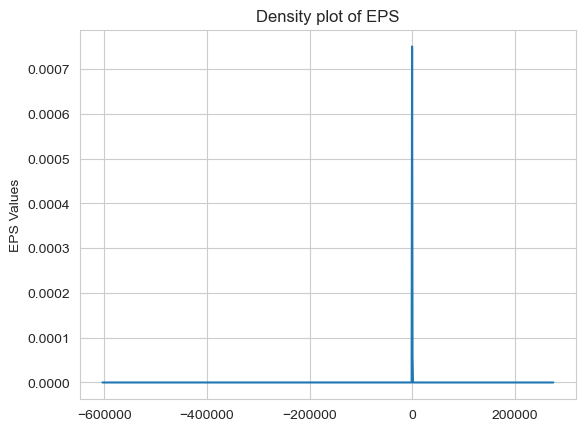

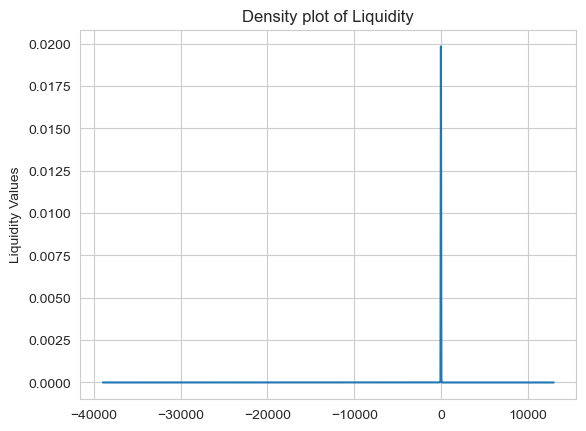

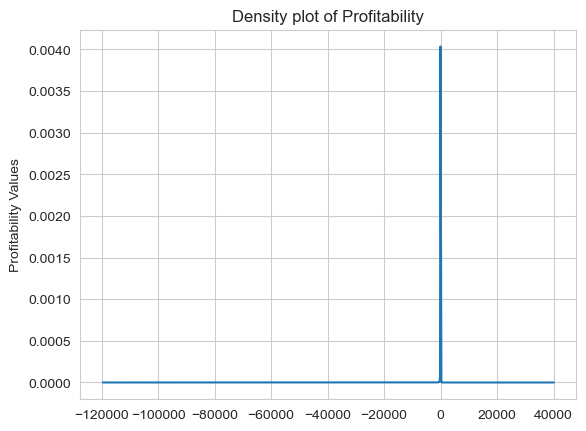

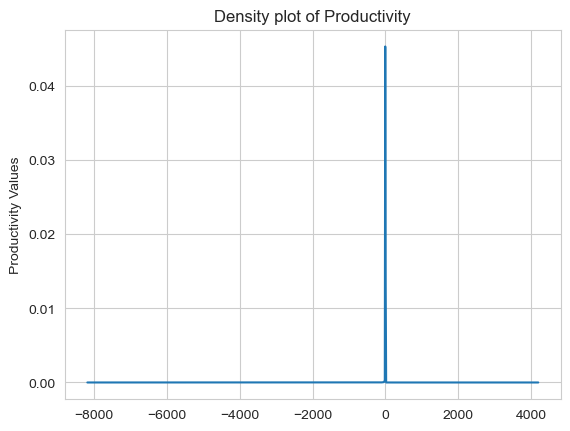

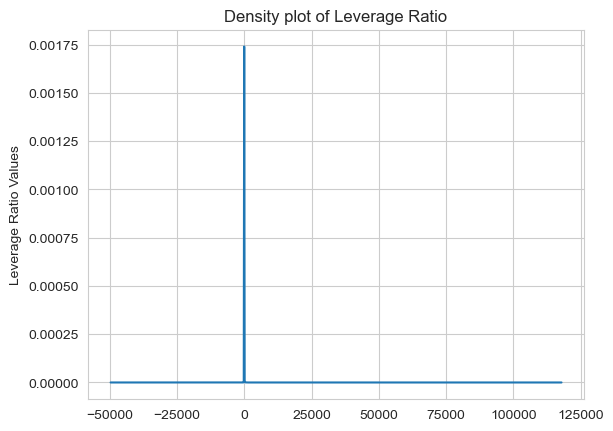

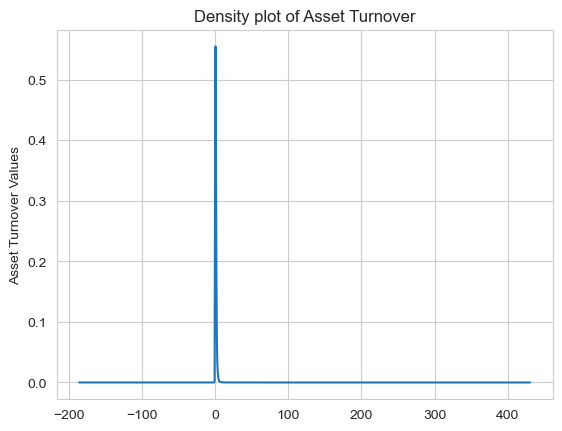

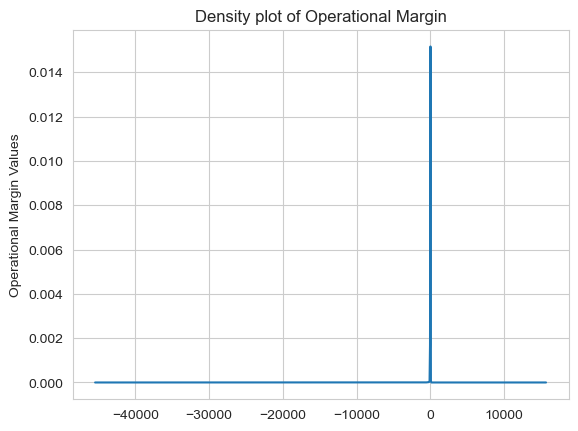

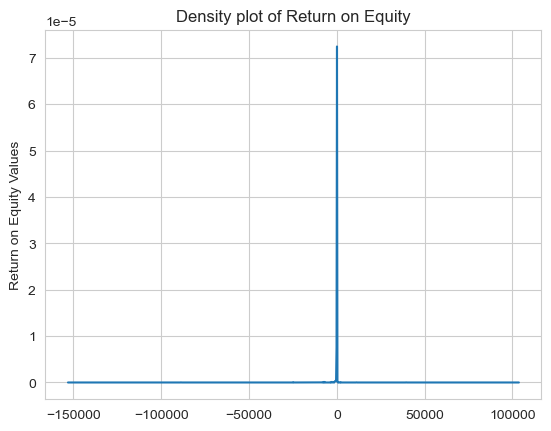

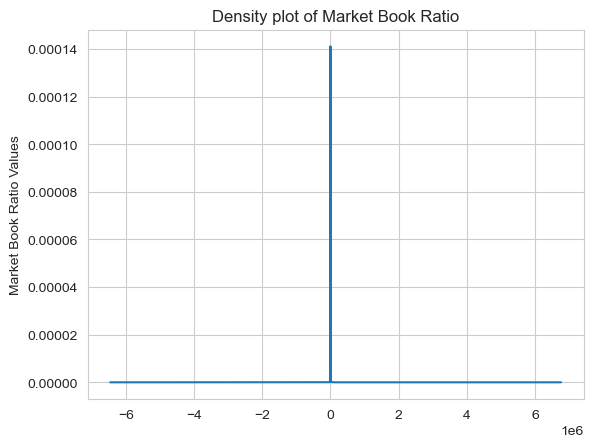

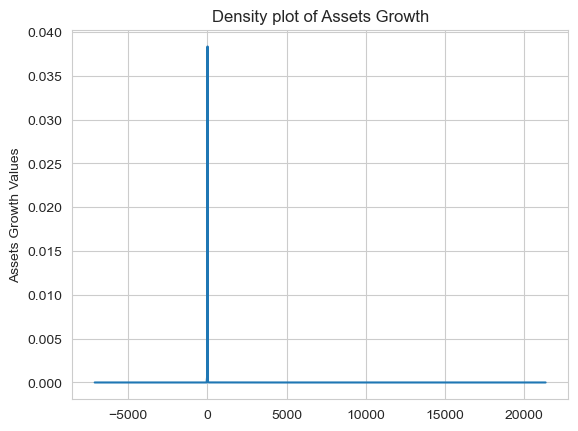

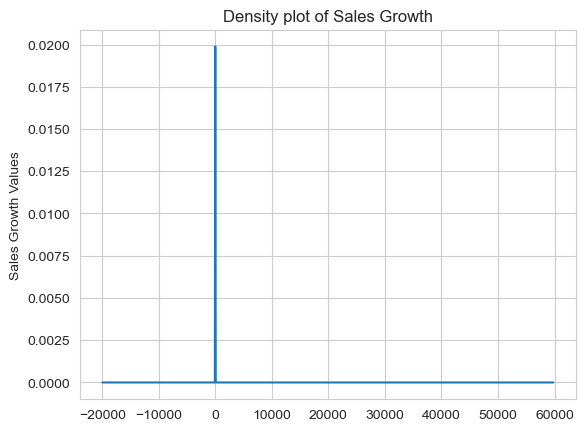

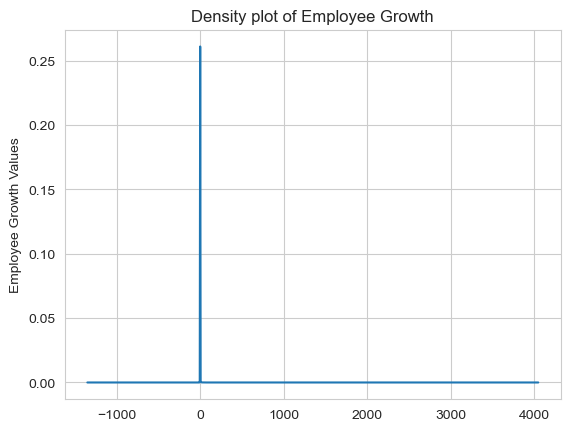

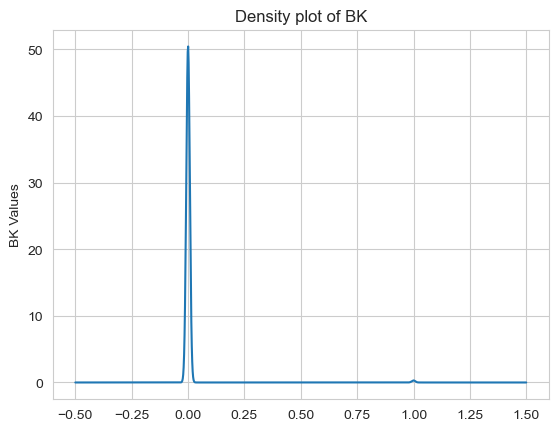

In [441]:
for col in df_copy.columns:
    df_copy[col].plot.density()
    plt.ylabel(f'{col} Values')
    plt.title(f'Density plot of {col}')
    plt.show()

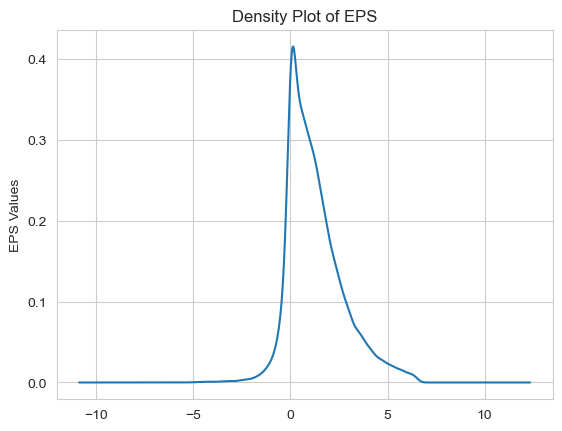

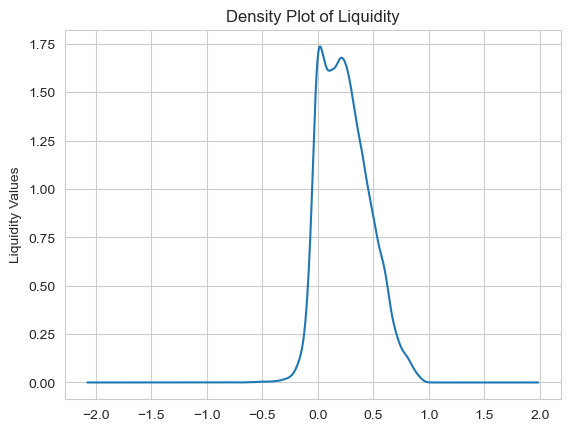

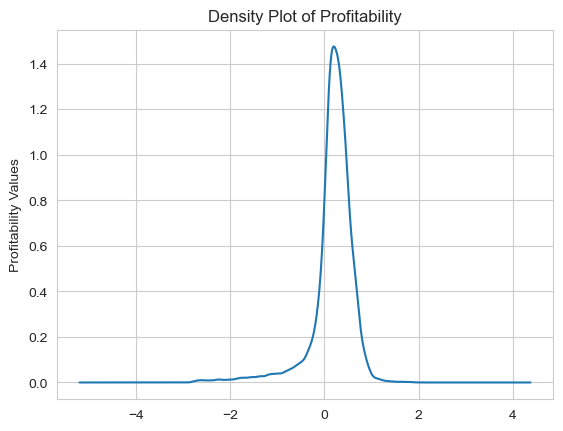

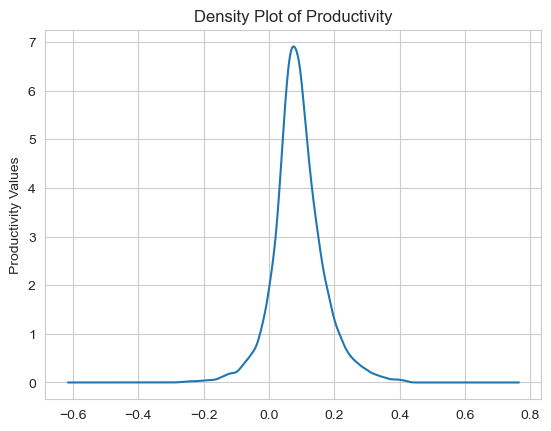

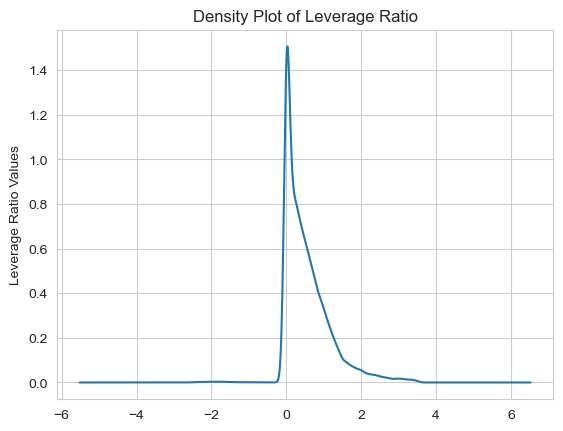

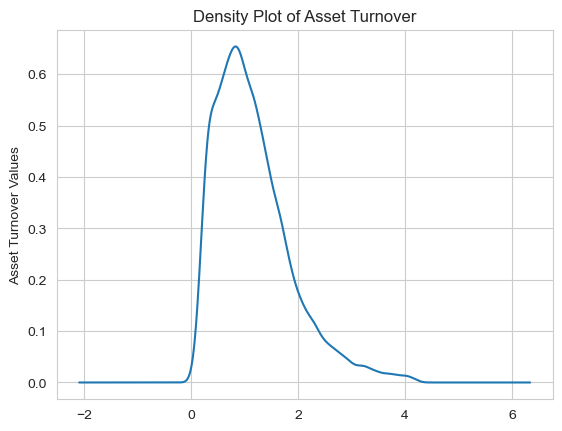

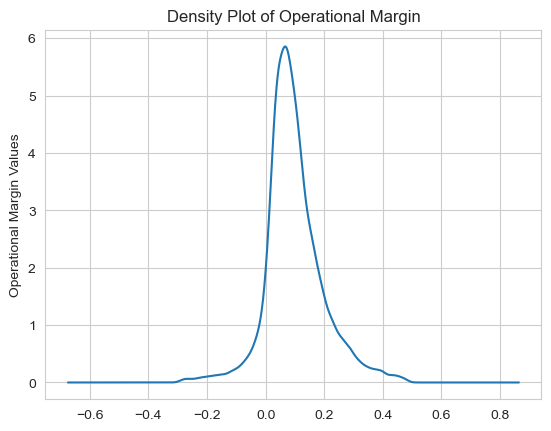

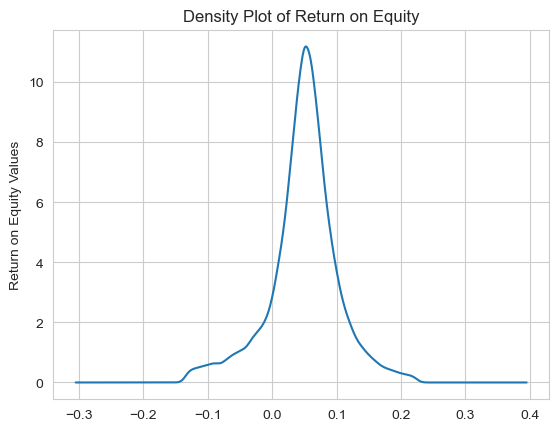

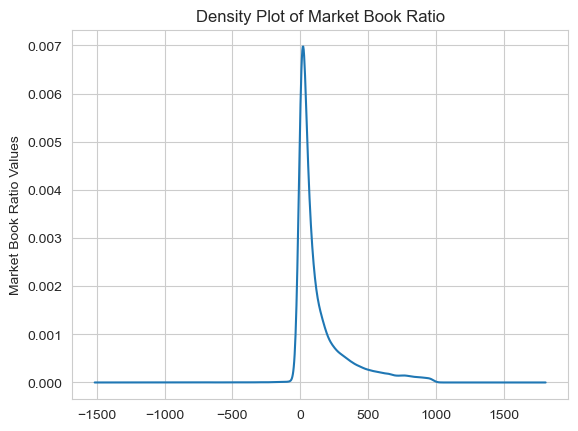

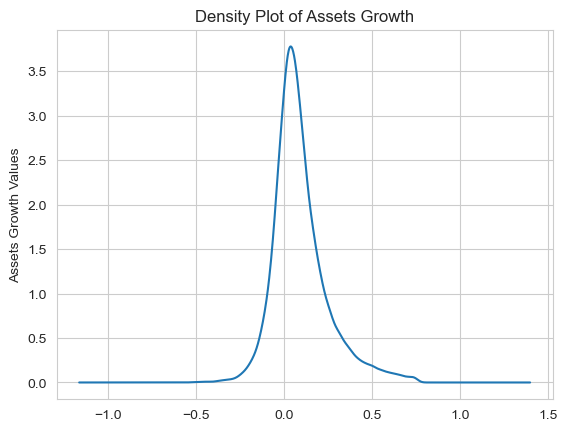

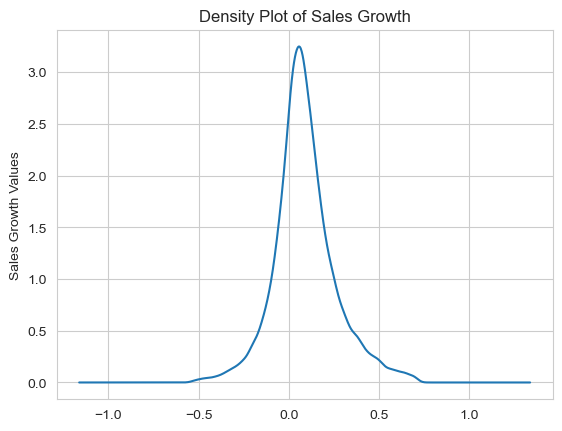

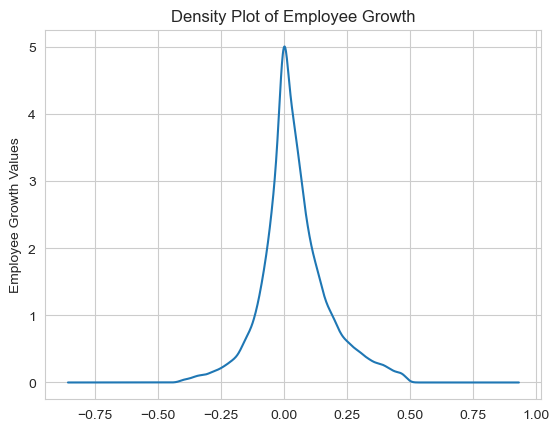

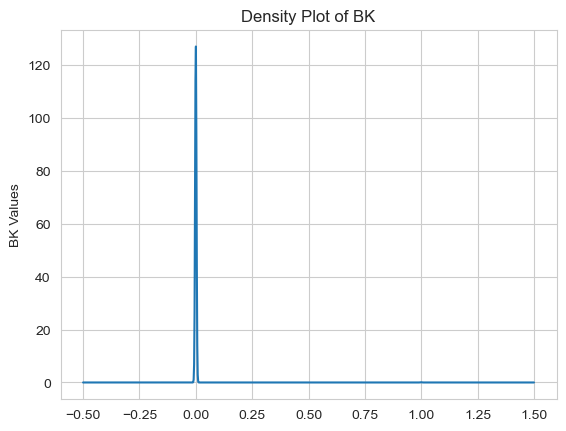

In [442]:
for col in cleaned_df_outer.columns:
    cleaned_df_outer[col].plot.density()
    plt.ylabel(f'{col} Values')
    plt.title(f'Density Plot of {col}')
    plt.show()

In [304]:
# We will only deal with the extreme outliers using the wi

Through the utilization of a bar chart, we uncovered a significant discrepancy within the dataset, with a vast majority of instances labeled as non-bankrupt (92,314 instances), contrasting with a mere 558 instances of bankrupt cases. This disparity can potentially bias machine learning models towards favoring the majority class.

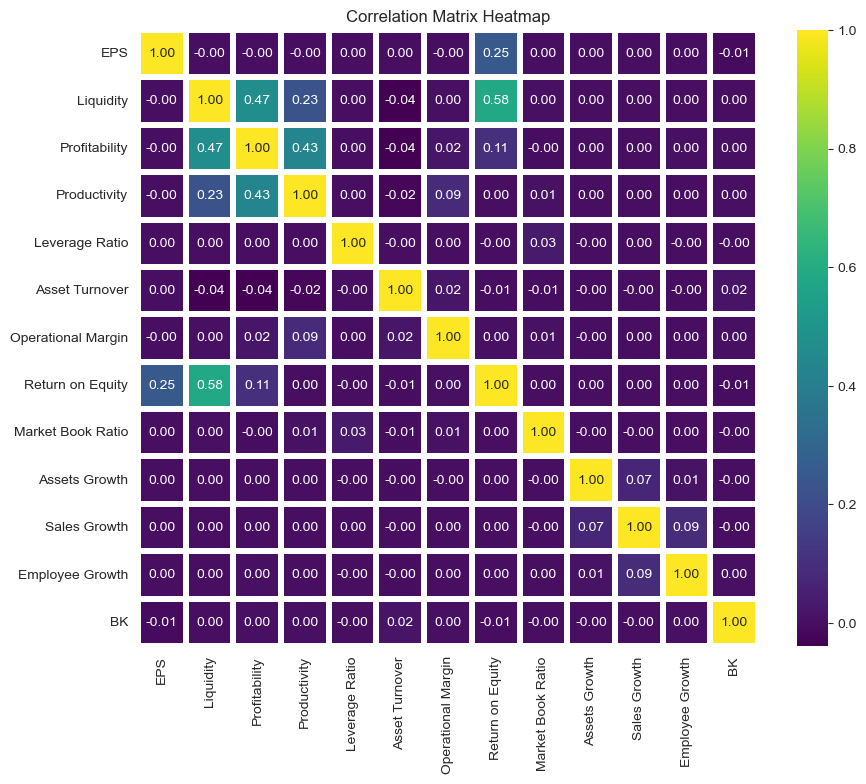

In [519]:
# Set the aesthetic style of the plots
corr_matrix = df_copy.corr()
corr_matrix
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix,annot=True,cmap='viridis',linewidths = 3.0,fmt = '.2f')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [520]:
features = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover',
                   'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth',
                   'Employee Growth']
for cols in features:
    df_copy[cols] = winsorize(df_copy[cols], limits=[0.05, 0.05])
    
# Winsorizing outliers
df_copy_wisnorize = winsorize_outliers(df_copy, features)

In [521]:
#Since the there extreme outliers that are pulling the mean, we will therefore use the median
for col in df_copy.columns:
    median_value = df_copy[col].median()
    df_copy[col].fillna(median_value, inplace=True)

In [522]:
#There are no more null values
df_copy.isnull().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [447]:
df_copy.shape

(92845, 13)

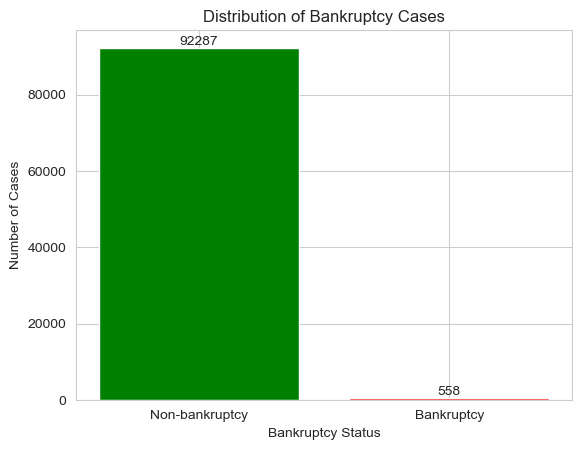

In [523]:
labels = [0, 1] 
count_bankruptcy = df_copy['BK'].value_counts()


# Plotting the bar chart

bars = plt.bar(labels, count_bankruptcy, color=['green', 'red'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
# Adding labels and title
plt.xlabel('Bankruptcy Status')
plt.ylabel('Number of Cases')
plt.title('Distribution of Bankruptcy Cases')

# Adding custom tick labels
plt.xticks(labels, ['Non-bankruptcy', 'Bankruptcy'])

# Display the plot
plt.show()

#There 92287 cases of no banktruptcy and only 558 cases of banktruptcy


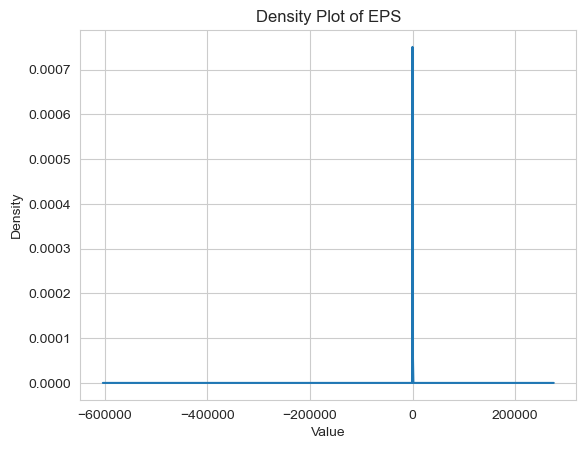

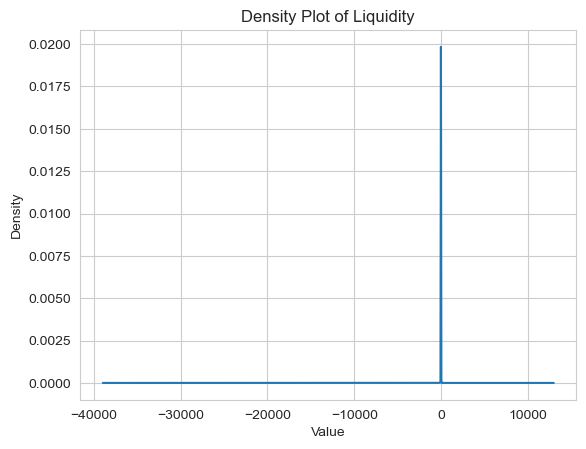

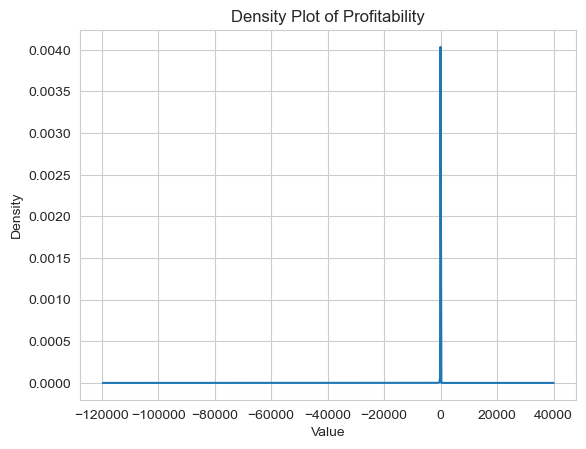

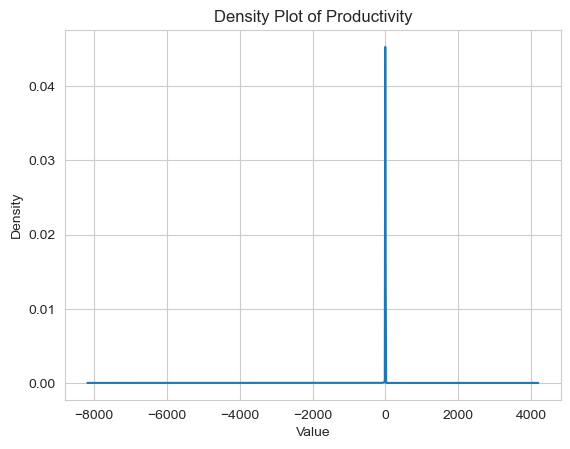

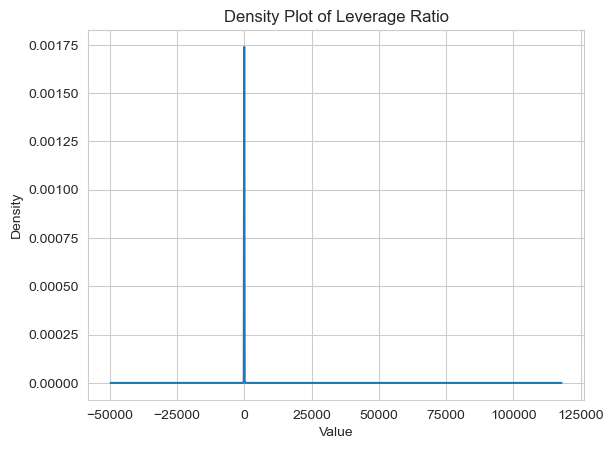

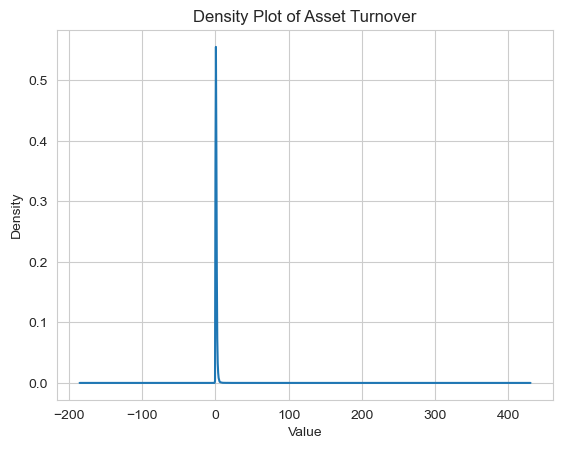

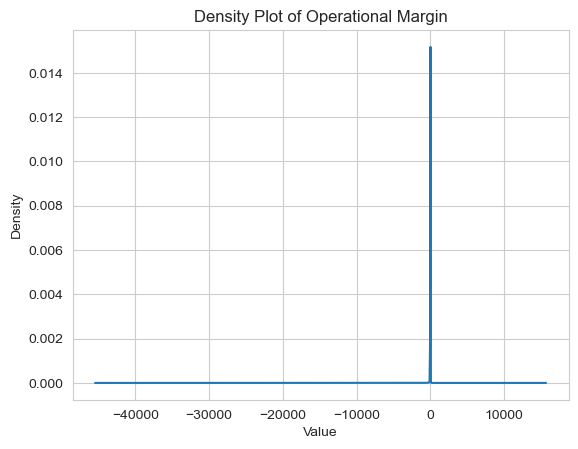

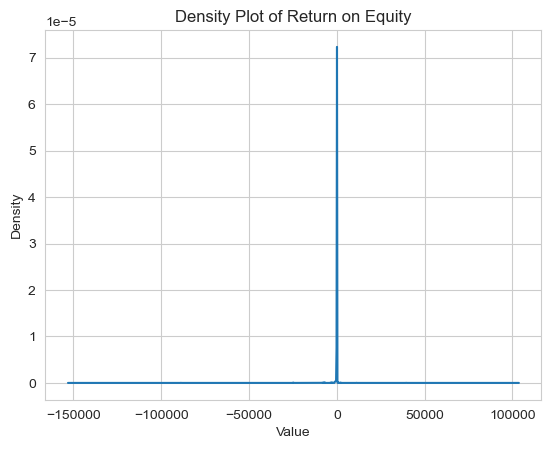

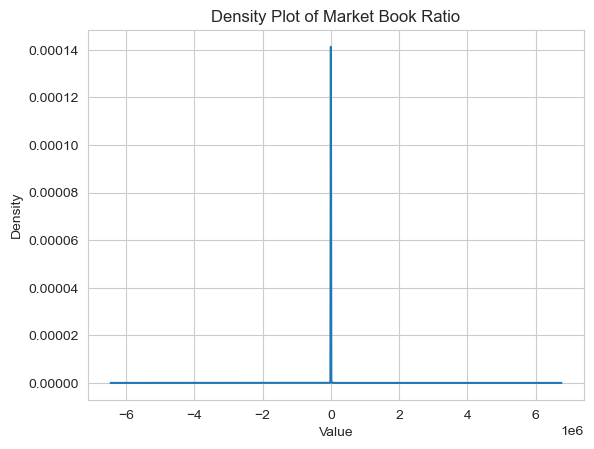

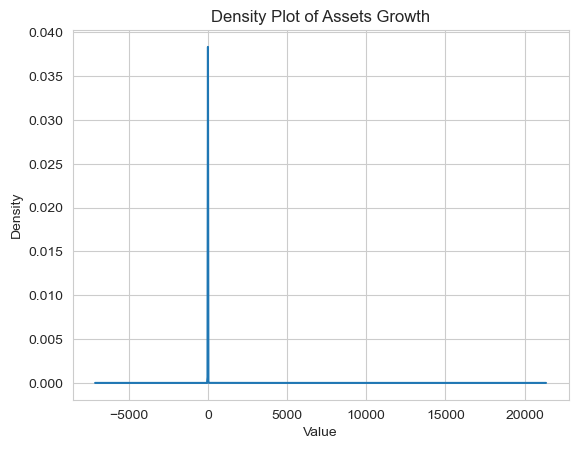

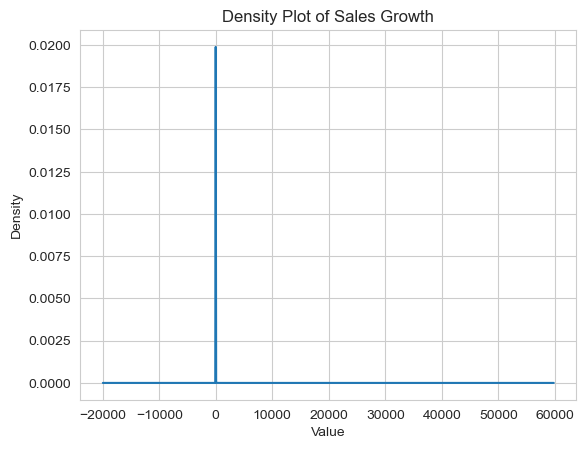

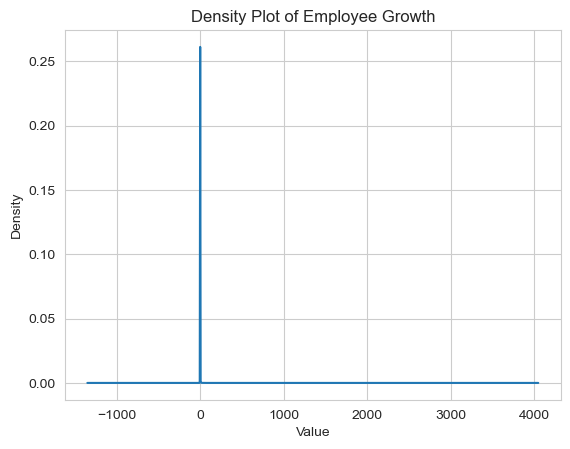

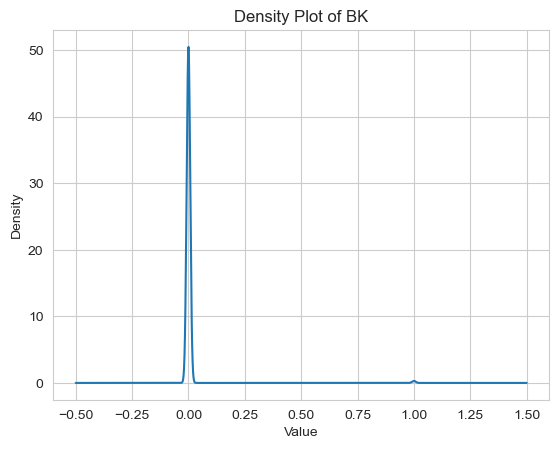

In [79]:
for col in df.columns:
    df[col].plot.density()
    plt.xlabel('Value')
    plt.title(f'Density Plot of {col}')
    plt.show()

In [524]:
df_copy_wisnorize["BK"].value_counts()

BK
0    92287
1      558
Name: count, dtype: int64

## Train-Test split

In [525]:
X = df_copy_wisnorize.drop('BK', axis=1)
y = df_copy_wisnorize['BK']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

## Resampling

In [526]:
smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

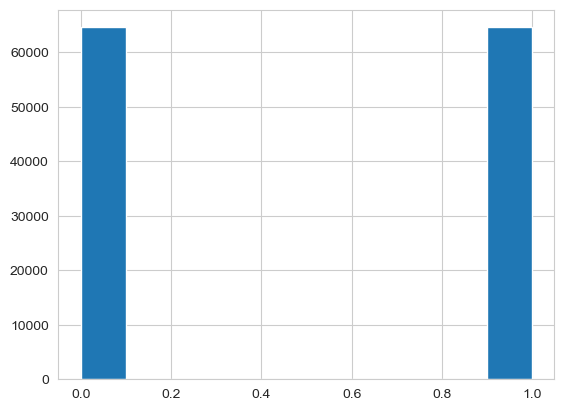

In [527]:
plt.hist(y_train_resampled_smote)
plt.show()

# Classification Algorithms

## Naive Bayes

In [535]:
# Define and train the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()  # Gaussian Naive Bayes for continuous features
naive_bayes_classifier.fit(X_train_resampled_smote, y_train_resampled_smote)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 5292 22395]
 [    2   165]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.19      0.32     27687
           1       0.01      0.99      0.01       167

    accuracy                           0.20     27854
   macro avg       0.50      0.59      0.17     27854
weighted avg       0.99      0.20      0.32     27854



In [533]:
cm = confusion_matrix(y_test, y_pred)

# Extracting the true negatives, false positives, false negatives, and true positives

tn, fp, fn, tp = cm.ravel()

# Print the values
print(f'True Positives (TP): {tp}')
print(f'False Positives (FP): {fp}')
print(f'True Negatives (TN): {tn}')
print(f'False Negatives (FN): {fn}')

True Positives (TP): 165
False Positives (FP): 22395
True Negatives (TN): 5292
False Negatives (FN): 2


## Reordering the confusion matrix to avoid confusion

In [570]:
original_cm = np.array([[5292, 22395],
                        [2, 165]])

# Flipping the matrix for my convenience 
reordered_cm = np.flip(original_cm)
reordered_cm

tp,fn,fp,tn  = reordered_cm.ravel()
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Negatives (TN):", tn)



True Positives (TP): 165
False Positives (FP): 22395
False Negatives (FN): 2
True Negatives (TN): 5292


In [571]:
y_scores = naive_bayes_classifier.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate AUC
auc_value = roc_auc_score(y_test, y_scores)
print(f'AUC: {auc_value:.2f}')


AUC: 0.87


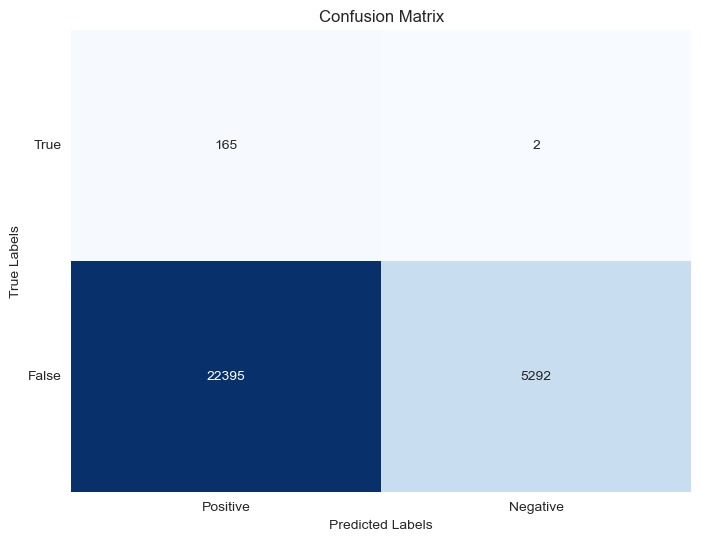

In [572]:
plt.figure(figsize=(8, 6))
sns.heatmap(reordered_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0.5, 1.5], labels=['True', 'False'])


# Rotating the tick labels for better readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Display the visualization of the Confusion Matrix
plt.show()

## GBM Classifier

In [573]:
gbm_classifier = xgb.XGBClassifier()
gbm_classifier.fit(X_train_resampled_smote, y_train_resampled_smote)

# Make predictions on the test set
y_pred = gbm_classifier.predict(X_test)

# Evaluate the model
print(f'Confusion Matrix:\n{cm2}')
cm2 = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
tn2, fp2, fn2, tp2 = cm2.ravel()

# Now you have the counts of true positives (TP), false positives (FP),
# false negatives (FN), and true negatives (TN)
print("True Positives (TP):", tp2)
print("False Positives (FP):", fp2)
print("False Negatives (FN):", fn2)
print("True Negatives (TN):", tn2)

Confusion Matrix:
[[26992   695]
 [  101    66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27687
           1       0.09      0.40      0.14       167

    accuracy                           0.97     27854
   macro avg       0.54      0.69      0.56     27854
weighted avg       0.99      0.97      0.98     27854

True Positives (TP): 66
False Positives (FP): 695
False Negatives (FN): 101
True Negatives (TN): 26992


In [576]:
gbm_classifier.fit(X_train_resampled_smote, y_train_resampled_smote)
y_pred = gbm_classifier.predict(X_test)


In [577]:
original_cm2 = np.array([[26995, 692],
                        [90, 77]])

# Flipping the matrix for my convenience 
reordered_cm2 = np.flip(original_cm2)
reordered_cm2

tp2,fn2,fp2,tn2  = reordered_cm2.ravel()
print("True Positives (TP):", tp2)
print("False Positives (FP):", fp2)
print("False Negatives (FN):", fn2)
print("True Negatives (TN):", tn2)

True Positives (TP): 77
False Positives (FP): 692
False Negatives (FN): 90
True Negatives (TN): 26995


In [578]:
y_scores = gbm_classifier.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate AUC
auc_value = roc_auc_score(y_test, y_scores)
print(f'AUC: {auc_value:.2f}')

AUC: 0.89


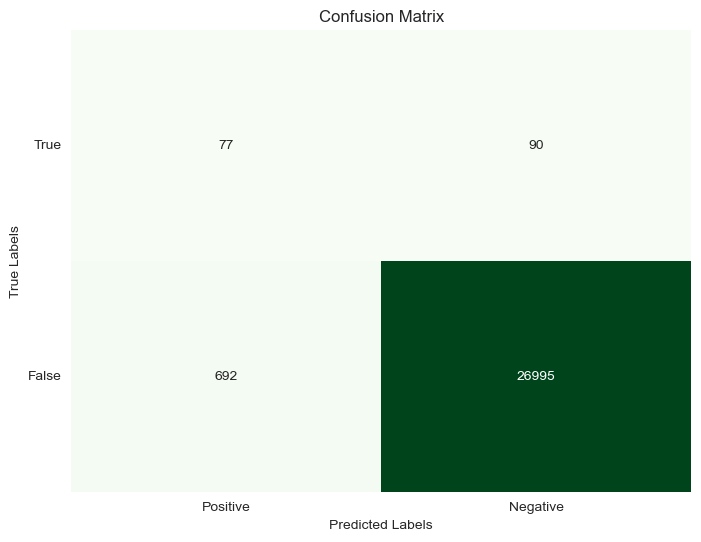

In [579]:
plt.figure(figsize=(8, 6))
sns.heatmap(reordered_cm2, annot=True, fmt='d', cmap='Greens', cbar=False)

# Adding titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0.5, 1.5], labels=['True', 'False'])

# Rotating the tick labels for better readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Display the visualization of the Confusion Matrix
plt.show()

## Logistic Regression

In [551]:
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_resampled_smote, y_train_resampled_smote)

# Make predictions on the test set
y_pred_lr = logistic_regression_classifier.predict(X_test)
print(f"Confusion Matrix:\n{cm3}")
cm3 = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[26992   695]
 [  101    66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27687
           1       0.09      0.40      0.14       167

    accuracy                           0.97     27854
   macro avg       0.54      0.69      0.56     27854
weighted avg       0.99      0.97      0.98     27854



In [549]:
y_scores = logistic_regression_classifier.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate AUC
auc_value = roc_auc_score(y_test, y_scores)
print(f'AUC: {auc_value:.2f}')

AUC: 0.89


In [554]:
original_cm3 = np.array([[26992, 695],
                        [101, 66]])

# Flipping the matrix for my convenience 
reordered_cm3 = np.flip(original_cm3)
reordered_cm3

tp3,fn3,fp3,tn3  = reordered_cm3.ravel()
print("True Positives (TP):", tp3)
print("False Positives (FP):", fp3)
print("False Negatives (FN):", fn3)
print("True Negatives (TN):", tn3)

True Positives (TP): 66
False Positives (FP): 695
False Negatives (FN): 101
True Negatives (TN): 26992


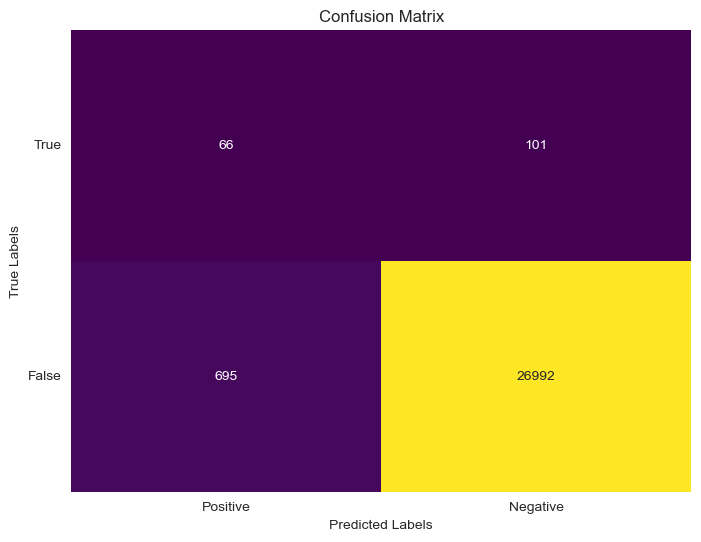

In [567]:
plt.figure(figsize=(8, 6))
sns.heatmap(reordered_cm3, annot=True, fmt='d', cmap='viridis', cbar=False)

# Adding titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0.5, 1.5], labels=['True', 'False'])


# Rotating the tick labels for better readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Display the visualization of the Confusion Matrix
plt.show()

## MDA Model

In [497]:
# Initialize the MDA model
mda_model = LinearDiscriminantAnalysis()

# Train the model on the training data
mda_model.fit(X_train_resampled_smote, y_train_resampled_smote)

# Make predictions on the test set
y_pred = mda_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[23874  3813]
 [   40   127]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     27687
           1       0.03      0.76      0.06       167

    accuracy                           0.86     27854
   macro avg       0.52      0.81      0.49     27854
weighted avg       0.99      0.86      0.92     27854



In [475]:
y_scores_lr = mda_model.predict_proba(X_test)[:, 1]  # get the probability of class 1

fpr, tpr, _ = roc_curve(y_test, y_scores_lr)
roc_auc = auc(fpr, tpr)

# Compute the AUC score
roc_auc_score_lr = roc_auc_score(y_test, y_scores_lr)
print(f"AUC: {roc_auc_score_lr}")


AUC: 0.8869659099830461


In [476]:
original_cm5 = np.array([[23731, 3956],
                        [39, 128]])

# Flipping the matrix for my convenience 
reordered_cm5 = np.flip(original_cm5)
reordered_cm5

tp5,fn5,fp5,tn5=reordered_cm5.ravel()
print("True Positives (TP):", tp5)
print("False Negatives (FN):", fn5)
print("False Positives (FP):", fp5)
print("True Negatives (TN):", tn5)

True Positives (TP): 128
False Negatives (FN): 39
False Positives (FP): 3956
True Negatives (TN): 23731


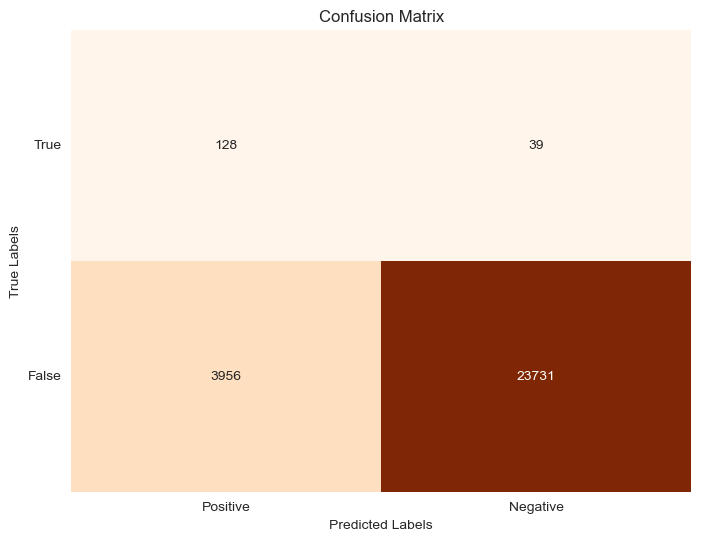

In [477]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(reordered_cm5, annot=True, fmt='d', cmap='Oranges', cbar=False)

# Adding titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0.5, 1.5], labels=['True', 'False'])



# Rotating the tick labels for better readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Display the visualization of the Confusion Matrix
plt.show()